In [2]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
creditrisk=pd.read_csv('data/CreditRiskData.csv', encoding='latin')

In [15]:
creditrisk.head(10)

,GoodCredit,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201
5,0,A14,36,A32,A46,9055,A65,A73,2,A93,...,4,A124,35,A143,A153,1,A172,2,A192,A201
6,0,A14,24,A32,A42,2835,A63,A75,3,A93,...,4,A122,53,A143,A152,1,A173,1,A191,A201
7,0,A12,36,A32,A41,6948,A61,A73,2,A93,...,2,A123,35,A143,A151,1,A174,1,A192,A201
8,0,A14,12,A32,A43,3059,A64,A74,2,A91,...,4,A121,61,A143,A152,1,A172,1,A191,A201
9,1,A12,30,A34,A40,5234,A61,A71,4,A94,...,2,A123,28,A143,A152,2,A174,1,A191,A201


In [16]:
creditrisk.shape

(1000, 21)

### Data description

- GoodCredit: Whether the issued loan was a good decision or bad
- checkingstatus: Status of existing checking account.
- duration: Duration of loan in months
- history: Credit history of the applicant
- purpose: Purpose for the loan
- amount: Credit amount
- savings: Savings account/bonds
- employ: Present employment since
- installment: Installment rate in percentage of disposable income
- status: Personal status and sex
- others: Other debtors / guarantors for the applicant
- residence: Present residence since
- property: Property type of applicant
- age: Age in years
- otherplans: Other installment plans
- housing: Housing
- cards: Number of existing credits at this bank
- job: Job
- liable: Number of people being liable to provide maintenance for
- tele: Is the Telephone registered or not
- foreign: Is the applicant a foreign worker


In [21]:
# Finding how many missing values are there for each 
creditrisk.isnull().sum()

GoodCredit        0
checkingstatus    0
duration          0
history           0
purpose           0
amount            0
savings           0
employ            0
installment       0
status            0
others            0
residence         0
property          0
age               0
otherplans        0
housing           0
cards             0
job               0
liable            0
tele              0
foreign           0
dtype: int64

The data set does not have any missing values. 

### Defining the problem statement:
- Create a Predictive model which can tell weather to approve a loan application or not?
- Target Variable: GoodCredit
- Predictors: duration, history, purpose, amount, savings etc.
- GoodCredit=1 means the loan was a good decision.
- GoodCredit=0 means the loan was a bad decision.

<AxesSubplot: xlabel='GoodCredit'>

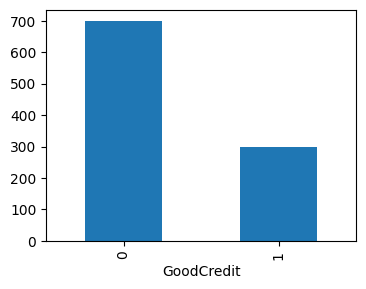

In [23]:
# Creating Bar chart as the Target variable is Categorical
GroupedData=creditrisk.groupby('GoodCredit').size()
GroupedData.plot(kind='bar', figsize=(4,3))

In [24]:
creditrisk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GoodCredit      1000 non-null   int64 
 1   checkingstatus  1000 non-null   object
 2   duration        1000 non-null   int64 
 3   history         1000 non-null   object
 4   purpose         1000 non-null   object
 5   amount          1000 non-null   int64 
 6   savings         1000 non-null   object
 7   employ          1000 non-null   object
 8   installment     1000 non-null   int64 
 9   status          1000 non-null   object
 10  others          1000 non-null   object
 11  residence       1000 non-null   int64 
 12  property        1000 non-null   object
 13  age             1000 non-null   int64 
 14  otherplans      1000 non-null   object
 15  housing         1000 non-null   object
 16  cards           1000 non-null   int64 
 17  job             1000 non-null   object
 18  liable   

### Visual Exploratory Data Analysis

- Categorical variables: Bar plot
- Continuous variables: Histogram

In [25]:
creditrisk.nunique()

GoodCredit          2
checkingstatus      4
duration           33
history             5
purpose            10
amount            921
savings             5
employ              5
installment         4
status              4
others              3
residence           4
property            4
age                53
otherplans          3
housing             3
cards               4
job                 4
liable              2
tele                2
foreign             2
dtype: int64

In [27]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same


In [35]:
def PlotBarCharts(inputData, columnsforPlot):
    
    # Generating multiple subplots
    
    fig, subPlot=plt.subplots(nrows=1, ncols=len(columnsforPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(columnsforPlot))

    for colName, plotNumber in zip(columnsforPlot, range(len(columnsforPlot))):
        inputData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])



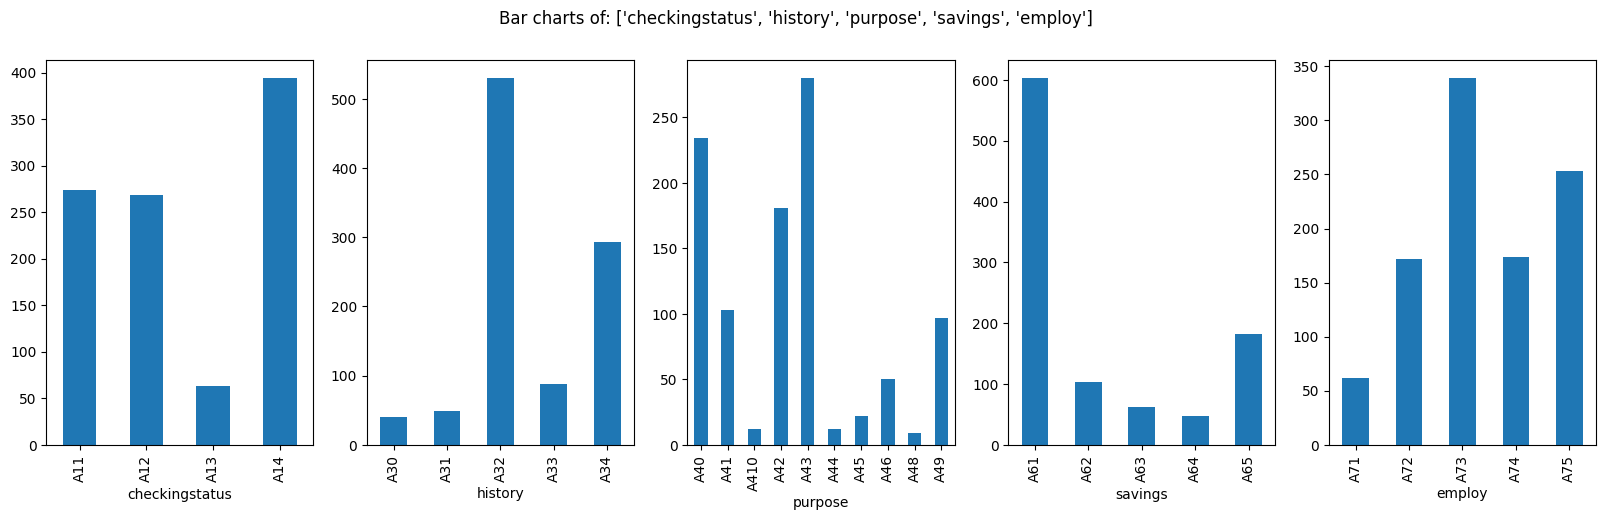

In [36]:
# Calling the function for 5 columns
PlotBarCharts(inputData=creditrisk, 
             columnsforPlot =['checkingstatus', 'history', 'purpose','savings','employ'])

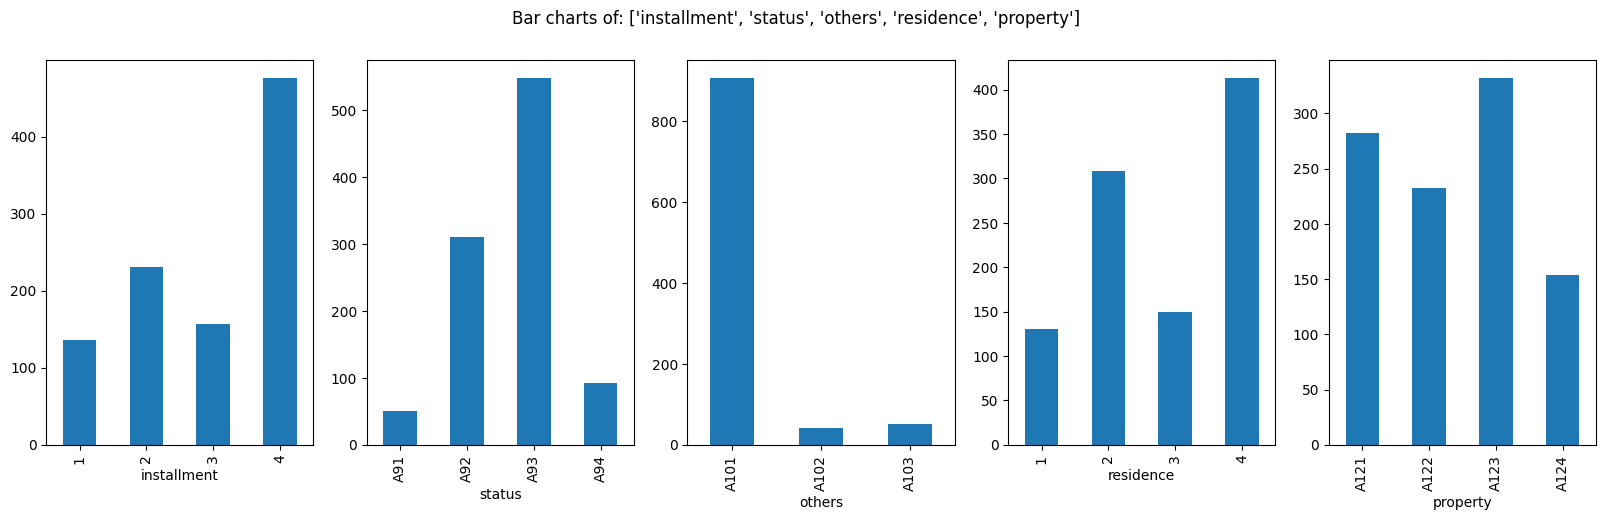

In [37]:
# Calling the function for 5 columns
PlotBarCharts(inputData=creditrisk, 
              columnsforPlot=['installment', 'status', 'others','residence', 'property'])


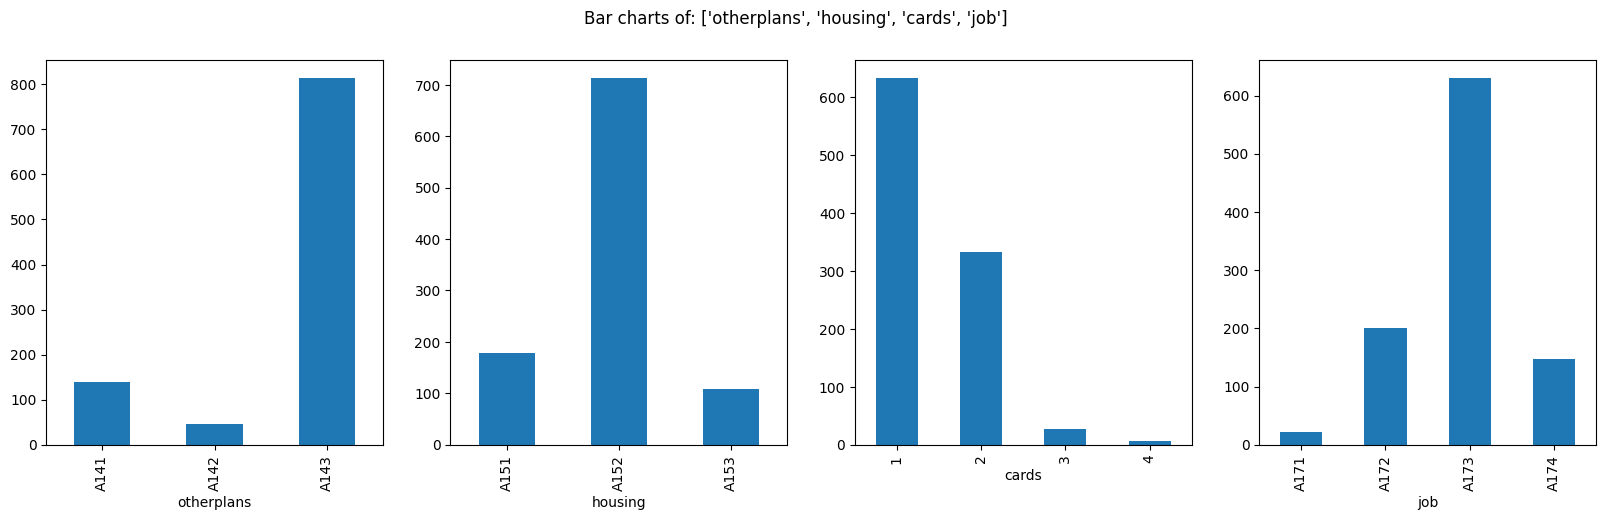

In [39]:
# Calling the function for 4 columns
PlotBarCharts(inputData=creditrisk, 
              columnsforPlot=['otherplans', 'housing', 'cards', 'job'])

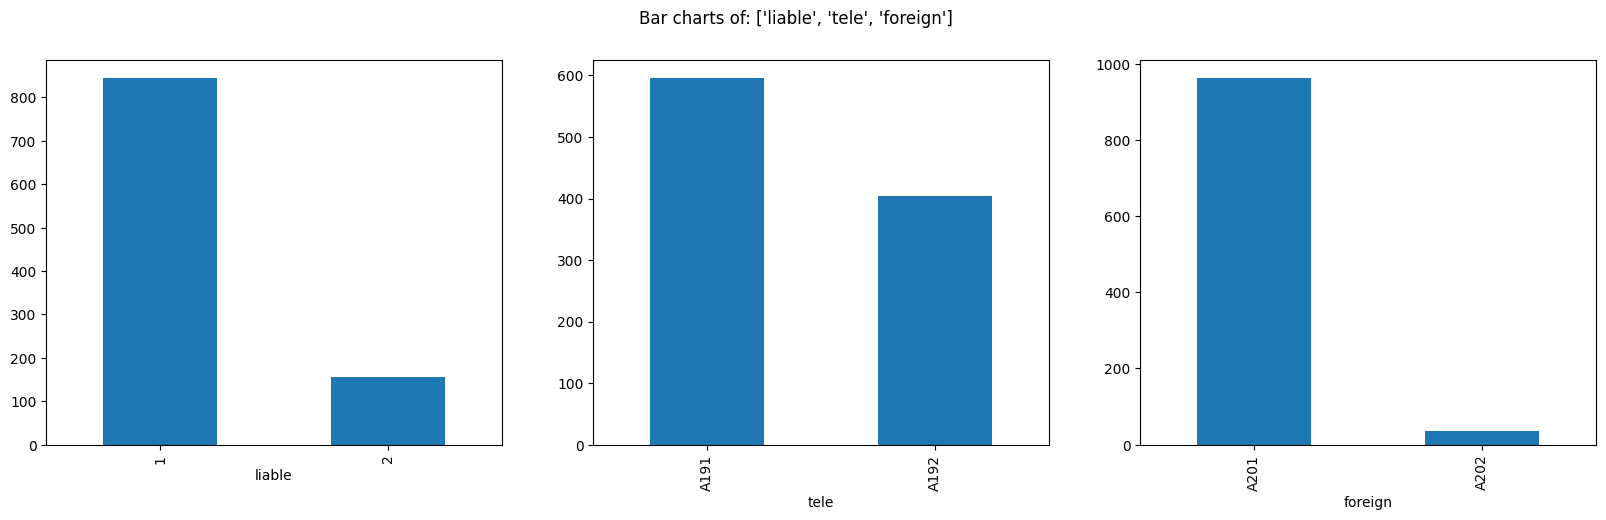

In [41]:
# Calling the function for 3 columns
PlotBarCharts(inputData=creditrisk, 
              columnsforPlot=['liable', 'tele', 'foreign'])